In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
sean = pd.read_csv("Preliminary Data - Sean.csv",skiprows=10)
sean_data = []
for i in range(5):
    df = sean[5*i: 5*(i+1)]
    sean_data.append(df)
sean_data[0]

,Measurements,Impulse (Ns),Peak Force (N)
0,ABS_10THOU_1,2.6688,23.5620
1,NaN,3.0969,30.9969
2,NaN,3.8433,27.1719
3,NaN,2.9307,15.0014
4,NaN,2.8192,21.5189


In [17]:
unfiltered = pd.read_csv("Preliminary Data - Colin & Gyan.csv", skiprows=10)
gyan_data = []
colin_data = []
for i in range(5):
    df = unfiltered[5*2*i: 5*(2*i+1)]
    gyan_data.append(df)
    df = unfiltered[5*(2*i+1): 5*(2*i+2)]
    colin_data.append(df)
display(gyan_data[0]) 
display(colin_data[0]) 

,Measurements,Impulse (Ns),Peak Force (N)
0,ABS 1,2.2270,28.1301
1,1,8.5320,93.2225
2,2,1.0811,27.2818
3,4,1.8355,30.6326
4,5,9.0210,62.3918


,Measurements,Impulse (Ns),Peak Force (N)
5,6,2.1004,33.3525
6,7,1.0214,24.1715
7,8,1.8088,31.9781
8,9,1.8612,36.3824
9,10,2.3569,31.0082


ValueError: X must have 2 or fewer dimensions

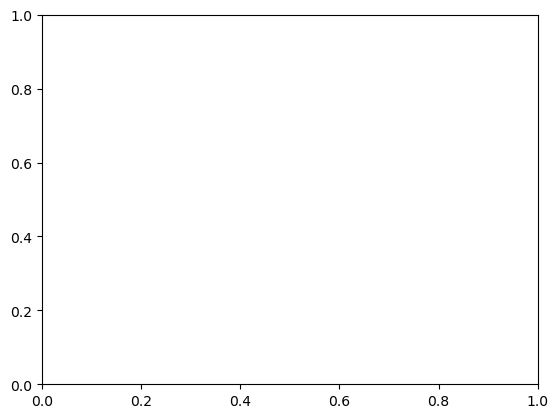

In [24]:
ticks = ["ABS 10mm", "ABS 20mm", "AL 10mm", "AL 20mm", "Cu 10mm"]

sean_plot = plt.boxplot(sean_data, 
                        positions=np.array(np.arange(len(sean_data))*2+0.3),
                       widths=0.6)
colin_plot = plt.boxplot(colin_data, 
                        positions=np.array(np.arange(len(colin_data))*2-0.3),
                       widths=0.6)
gyan_plot = plt.boxplot(gyan_data, 
                        positions=np.array(np.arange(len(gyan_data))*2),
                       widths=0.6)

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)

    plt.plot([], c=color_code, label=label)
    plt.legend()

define_box_properties(sean_plot, "b", "Sean")
define_box_properties(colin_plot, "r", "Colin")
define_box_properties(gyan_plot, "g", "Gyan")

plt.xticks(np.arange(0, len(ticks)*2,2), ticks)

plt.show()

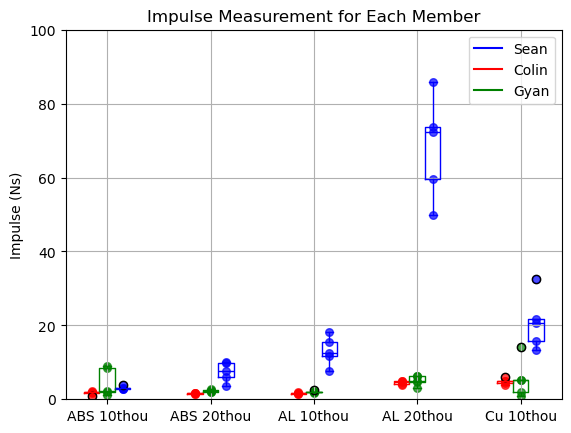

In [53]:
sean_impulses = [df["Impulse (Ns)"].dropna() for df in sean_data]
colin_impulses = [df["Impulse (Ns)"].dropna() for df in colin_data]
gyan_impulses  = [df["Impulse (Ns)"].dropna() for df in gyan_data]

ticks = ["ABS 10thou", "ABS 20thou", "AL 10thou", "AL 20thou", "Cu 10thou"]

# Use the numeric impulses we extracted:
sean_plot = plt.boxplot(
    sean_impulses, 
    positions=np.arange(len(sean_impulses))*2 + 0.3,
    widths=0.3
)

colin_plot = plt.boxplot(
    colin_impulses, 
    positions=np.arange(len(colin_impulses))*2 - 0.3,
    widths=0.3
)

gyan_plot = plt.boxplot(
    gyan_impulses, 
    positions=np.arange(len(gyan_impulses))*2, 
    widths=0.3
)

def define_box_properties(plot_dict, color_code, label):
    for line_type, line_list in plot_dict.items():
        plt.setp(line_list, color=color_code)
    # Dummy line for legend
    plt.plot([], c=color_code, label=label)

define_box_properties(sean_plot,  "b", "Sean")
define_box_properties(colin_plot, "r", "Colin")
define_box_properties(gyan_plot,  "g", "Gyan")

# Overlay points for Sean
for i, yvals in enumerate(sean_impulses):
    xvals = np.full(len(yvals), i*2 + 0.3)  # same x for all points in group i
    plt.scatter(xvals, yvals, color="blue", alpha=0.7, s=30)

# Overlay points for Colin
for i, yvals in enumerate(colin_impulses):
    xvals = np.full(len(yvals), i*2 - 0.3)
    plt.scatter(xvals, yvals, color="red", alpha=0.7, s=30)

# Overlay points for Gyan
for i, yvals in enumerate(gyan_impulses):
    xvals = np.full(len(yvals), i*2)
    plt.scatter(xvals, yvals, color="green", alpha=0.7, s=30)

plt.legend()

# Match the number of groups
plt.xticks(np.arange(0, len(ticks)*2, 2), ticks)
# plt.ylim([0, 10])
plt.title("Impulse Measurement for Each Member")
# plt.xlabel("Material")
plt.ylabel("Impulse (Ns)")
plt.ylim([0, 100])
plt.grid()
plt.savefig("impulse_box_plot.png",dpi=500)
plt.show()

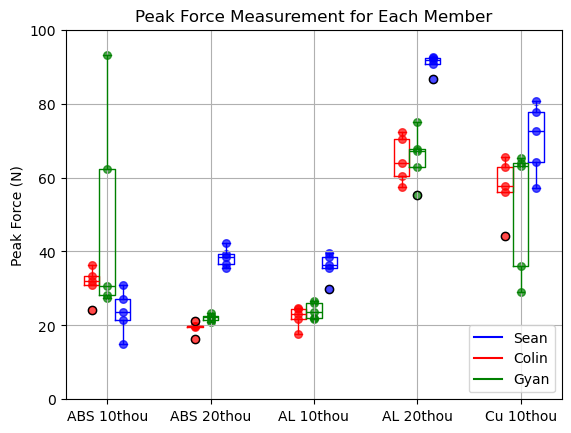

In [52]:
sean_force = [df["Peak Force (N)"].dropna() for df in sean_data]
colin_force = [df["Peak Force (N)"].dropna() for df in colin_data]
gyan_force = [df["Peak Force (N)"].dropna() for df in gyan_data]
ticks = ["ABS 10thou", "ABS 20thou", "AL 10thou", "AL 20thou", "Cu 10thou"]

# Use the numeric impulses we extracted:
sean_plot = plt.boxplot(
    sean_force, 
    positions=np.arange(len(sean_force))*2 + 0.3,
    widths=0.3
)

colin_plot = plt.boxplot(
    colin_force, 
    positions=np.arange(len(colin_force))*2 - 0.3,
    widths=0.3
)

gyan_plot = plt.boxplot(
    gyan_force, 
    positions=np.arange(len(gyan_force))*2, 
    widths=0.3
)

def define_box_properties(plot_dict, color_code, label):
    for line_type, line_list in plot_dict.items():
        plt.setp(line_list, color=color_code)
    # Dummy line for legend
    plt.plot([], c=color_code, label=label)

define_box_properties(sean_plot,  "b", "Sean")
define_box_properties(colin_plot, "r", "Colin")
define_box_properties(gyan_plot,  "g", "Gyan")

# Overlay points for Sean
for i, yvals in enumerate(sean_force):
    xvals = np.full(len(yvals), i*2 + 0.3)  # same x for all points in group i
    plt.scatter(xvals, yvals, color="blue", alpha=0.7, s=30)

# Overlay points for Colin
for i, yvals in enumerate(colin_force):
    xvals = np.full(len(yvals), i*2 - 0.3)
    plt.scatter(xvals, yvals, color="red", alpha=0.7, s=30)

# Overlay points for Gyan
for i, yvals in enumerate(gyan_force):
    xvals = np.full(len(yvals), i*2)
    plt.scatter(xvals, yvals, color="green", alpha=0.7, s=30)
plt.legend()

# Match the number of groups
plt.xticks(np.arange(0, len(ticks)*2, 2), ticks)
# plt.ylim([0, 10])
plt.title("Peak Force Measurement for Each Member")
# plt.xlabel("Material")
plt.ylabel("Peak Force (N)")
plt.ylim([0, 100])
plt.grid()
plt.savefig("peak_force_box_plot.png", dpi=500)
plt.show()

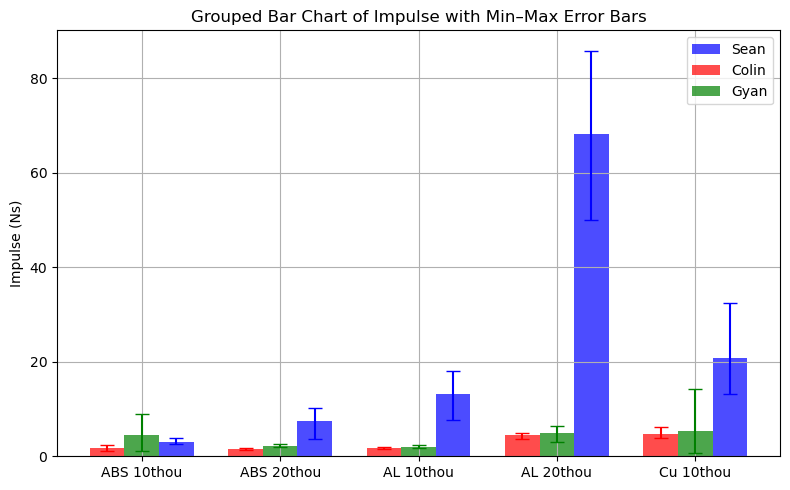

In [50]:
sean_impulses = [df["Impulse (Ns)"].dropna() for df in sean_data]
colin_impulses = [df["Impulse (Ns)"].dropna() for df in colin_data]
gyan_impulses  = [df["Impulse (Ns)"].dropna() for df in gyan_data]

sean_means = np.array([vals.mean() for vals in sean_impulses])
sean_mins  = np.array([vals.min()  for vals in sean_impulses])
sean_maxs  = np.array([vals.max()  for vals in sean_impulses])

colin_means = np.array([vals.mean() for vals in colin_impulses])
colin_mins  = np.array([vals.min()  for vals in colin_impulses])
colin_maxs  = np.array([vals.max()  for vals in colin_impulses])

gyan_means = np.array([vals.mean() for vals in gyan_impulses])
gyan_mins  = np.array([vals.min()  for vals in gyan_impulses])
gyan_maxs  = np.array([vals.max()  for vals in gyan_impulses])

sean_lower_err = sean_means - sean_mins
sean_upper_err = sean_maxs - sean_means
sean_yerr = np.vstack([sean_lower_err, sean_upper_err])

colin_lower_err = colin_means - colin_mins
colin_upper_err = colin_maxs - colin_means
colin_yerr = np.vstack([colin_lower_err, colin_upper_err])

gyan_lower_err = gyan_means - gyan_mins
gyan_upper_err = gyan_maxs - gyan_means
gyan_yerr = np.vstack([gyan_lower_err, gyan_upper_err])

ticks = ["ABS 10thou", "ABS 20thou", "AL 10thou", "AL 20thou", "Cu 10thou"]
x = np.arange(len(ticks))  # x = [0,1,2,3,4]
width = 0.25

plt.figure(figsize=(8, 5))

# Sean bars (shift left by width)
plt.bar(
    x + width, 
    sean_means, 
    width=width, 
    color="blue", alpha=0.7, 
    label="Sean",
    yerr=sean_yerr,
    error_kw=dict(ecolor="blue", capsize=5)
)

# Colin bars (no shift)
plt.bar(
    x - width, 
    colin_means, 
    width=width, 
    color="red", alpha=0.7, 
    label="Colin",
    yerr=colin_yerr,
    error_kw=dict(ecolor="red", capsize=5)
)

# Gyan bars (shift right by width)
plt.bar(
    x, 
    gyan_means, 
    width=width, 
    color="green", alpha=0.7, 
    label="Gyan",
    yerr=gyan_yerr,
    error_kw=dict(ecolor="green", capsize=5)
)

# Set x-ticks in the middle of the group
plt.xticks(x, ticks, rotation=0)
plt.ylabel("Impulse (Ns)")
plt.title("Grouped Bar Chart of Impulse with Min–Max Error Bars")
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig("Impulse_bar_chart.png", dpi=500)
plt.show()

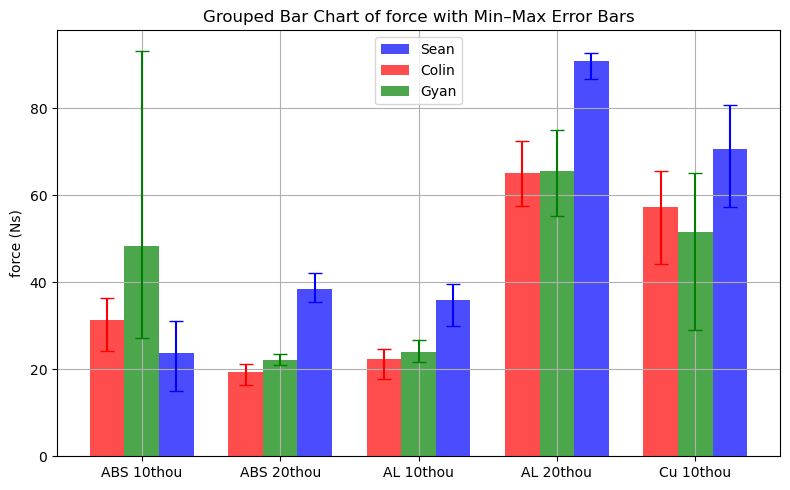

In [51]:
sean_forces = [df["Peak Force (N)"].dropna() for df in sean_data]
colin_forces = [df["Peak Force (N)"].dropna() for df in colin_data]
gyan_forces  = [df["Peak Force (N)"].dropna() for df in gyan_data]

sean_means = np.array([vals.mean() for vals in sean_forces])
sean_mins  = np.array([vals.min()  for vals in sean_forces])
sean_maxs  = np.array([vals.max()  for vals in sean_forces])

colin_means = np.array([vals.mean() for vals in colin_forces])
colin_mins  = np.array([vals.min()  for vals in colin_forces])
colin_maxs  = np.array([vals.max()  for vals in colin_forces])

gyan_means = np.array([vals.mean() for vals in gyan_forces])
gyan_mins  = np.array([vals.min()  for vals in gyan_forces])
gyan_maxs  = np.array([vals.max()  for vals in gyan_forces])

sean_lower_err = sean_means - sean_mins
sean_upper_err = sean_maxs - sean_means
sean_yerr = np.vstack([sean_lower_err, sean_upper_err])

colin_lower_err = colin_means - colin_mins
colin_upper_err = colin_maxs - colin_means
colin_yerr = np.vstack([colin_lower_err, colin_upper_err])

gyan_lower_err = gyan_means - gyan_mins
gyan_upper_err = gyan_maxs - gyan_means
gyan_yerr = np.vstack([gyan_lower_err, gyan_upper_err])

ticks = ["ABS 10thou", "ABS 20thou", "AL 10thou", "AL 20thou", "Cu 10thou"]
x = np.arange(len(ticks))  # x = [0,1,2,3,4]
width = 0.25

plt.figure(figsize=(8, 5))

# Sean bars (shift left by width)
plt.bar(
    x + width, 
    sean_means, 
    width=width, 
    color="blue", alpha=0.7, 
    label="Sean",
    yerr=sean_yerr,
    error_kw=dict(ecolor="blue", capsize=5)
)

# Colin bars (no shift)
plt.bar(
    x - width, 
    colin_means, 
    width=width, 
    color="red", alpha=0.7, 
    label="Colin",
    yerr=colin_yerr,
    error_kw=dict(ecolor="red", capsize=5)
)

# Gyan bars (shift right by width)
plt.bar(
    x, 
    gyan_means, 
    width=width, 
    color="green", alpha=0.7, 
    label="Gyan",
    yerr=gyan_yerr,
    error_kw=dict(ecolor="green", capsize=5)
)

# Set x-ticks in the middle of the group
plt.xticks(x, ticks, rotation=0)
plt.ylabel("force (Ns)")
plt.title("Grouped Bar Chart of force with Min–Max Error Bars")
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig("force_bar_chart.png",dpi=500)
plt.show()